In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
np.random.choice(["H", "T"])

# Randomly chooses one option from the list of options provided

'H'

In [9]:
np.random.choice(["H", "T", "T"])

# Now, probability of "T" -> 2/3
# Probability of "H" -> 1/3

'T'

In [13]:
np.random.choice(["H", "T"], size = 4)

array(['H', 'H', 'H', 'H'], dtype='<U1')

In [14]:
# Let's use this for the casino example

In [15]:
np.random.choice(["R", "R", "R", "B", "B"])

'R'

In [16]:
np.random.choice(["R", "R", "R", "B", "B"], size = 4)

array(['B', 'R', 'B', 'B'], dtype='<U1')

In [17]:
np.count_nonzero([1,2,3,0,0,0,0,0])

3

In [18]:
draws = np.random.choice(["R", "R", "R", "B", "B"], size = 4)

In [19]:
draws

array(['R', 'R', 'R', 'B'], dtype='<U1')

In [20]:
draws == "R"

array([ True,  True,  True, False])

In [22]:
np.count_nonzero(draws == "R")

3

In [56]:
# Let's do this experiment 10000 times

red_values = []

for i in range(10000):
    draws = np.random.choice(["R", "R", "R", "B", "B"], size = 4)
    num_reds = np.count_nonzero(draws == "R")
    red_values.append(num_reds)

In [57]:
# red_values

In [58]:
pd.value_counts(red_values)

2    3505
3    3487
1    1482
4    1275
0     251
Name: count, dtype: int64

In [59]:
# Calculating probabilities using value_counts

pd.value_counts(red_values, normalize = True)

2    0.3505
3    0.3487
1    0.1482
4    0.1275
0    0.0251
Name: proportion, dtype: float64

In [60]:
empirical_expectation = np.mean(red_values)

In [61]:
empirical_expectation

2.4053

In [62]:
# COIN TOSS

In [32]:
pd.value_counts(
    np.random.choice(["H", "T"], size = 10),
    normalize = True
)

H    0.7
T    0.3
Name: proportion, dtype: float64

In [36]:
pd.value_counts(
    np.random.choice(["H", "T"], size = 1000000),
    normalize = True
)

H    0.500045
T    0.499955
Name: proportion, dtype: float64

In [38]:
# Theoritical values computation

In [39]:
math.comb(4,0) # Combination function in the math library

1

In [63]:
p_0 = math.comb(4, 0) * (3/5) ** 0 * (2/5) ** 4
p_1 = math.comb(4, 1) * (3/5) ** 1 * (2/5) ** 3
p_2 = math.comb(4, 2) * (3/5) ** 2 * (2/5) ** 2
p_3 = math.comb(4, 3) * (3/5) ** 3 * (2/5) ** 1
p_4 = math.comb(4, 4) * (3/5) ** 4 * (2/5) ** 0

In [44]:
red_values = []

for i in range(100000):
    draws = np.random.choice(["R", "R", "R", "B", "B"], size = 4)
    num_reds = np.count_nonzero(draws == "R")
    red_values.append(num_reds)

pd.value_counts(red_values, normalize = True)

3    0.34562
2    0.34482
1    0.15444
4    0.12937
0    0.02575
Name: proportion, dtype: float64

In [42]:
print(p_0, p_1, p_2, p_3, p_4, sep = "\n")

0.025600000000000005
0.15360000000000004
0.3456000000000001
0.34559999999999996
0.1296


In [47]:
x = pd.value_counts(red_values, normalize = True)

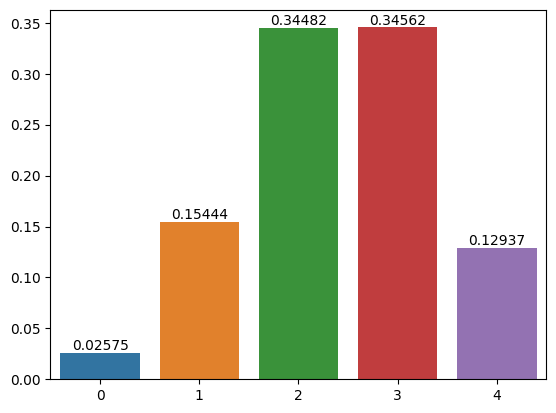

In [49]:
ax = sns.barplot(x = x.index, y = x.values)

for i in ax.containers:
    ax.bar_label(i,)

In [50]:
# PROBABILITY MASS FUNCTION ^

In [51]:
from scipy.stats import binom

In [52]:
prob_0_red = binom.pmf(n = 4, p = 3/5, k = 0)

In [53]:
prob_0_red

0.025600000000000005

In [64]:
theoritical_expectation = 0 * p_0 + 1 * p_1 + 2 * p_2 + 3 * p_3 + 4 * p_4

In [65]:
theoritical_expectation

2.4000000000000004

In [66]:
empirical_expectation

2.4053

In [67]:
# Let's define another random variable
# Y -> {150, -10}

# P(Y = 150) = P(X = 4)
# P(Y = -10) = 1 - P(X = 4)

In [68]:
p_4

0.1296

In [69]:
expected_y = 150 * 0.1296 + (-10 * (1 - 0.1296))

In [70]:
expected_y

10.735999999999997

In [71]:
'''
Bernoulli Trials - 
A binomial distribution with a single trial or n = 1.
'''

'\nBernoulli Trials - \nA binomial distribution with a single trial or n = 1.\n'

In [72]:
'''
HOMEWORK ->

You toss 2 dice. If both dice are 6, you get Rs 2. 
Else, if one dice is 6, you get Rs 1.
Otherwise, you do not get anything.

Expected amount of money to be won.
'''

'\nHOMEWORK ->\n\nYou toss 2 dice. If both dice are 6, you get Rs 2. \nElse, if one dice is 6, you get Rs 1.\nOtherwise, you do not get anything.\n\nExpected amount of money to be won.\n'

In [73]:
1 - (binom.pmf(n = 10, p = 1/4, k = 0) + binom.pmf(n = 10, p = 1/4, k = 1) + binom.pmf(n = 10, p = 1/4, k = 2) + binom.pmf(n = 10, p = 1/4, k = 3))

0.22412490844726585

In [75]:
1 - binom.cdf(n = 10, p = 1/4, k = 3)

# Cumulates all the Probability Values till the given value of k

0.22412490844726562

In [76]:
binom.pmf(n = 10, p = 1/4, k = 2)

0.28156757354736334